
# Distribution analysis and LDA method

 Developed By: Javier Mendoza - Kevin Reyes



## 1. Distribution approximation



### 1.1 Approximation of a discrete distribution with a continuous distribution.

 If we consider the histogram of a discrete distribution, we can interpret that the probability of obtaining a certain value $x_0$ corresponds to the area occupied by the histogram bar centered at $x_0$. If we have a curve of a continuous distribution that resembles the shape of the discrete distribution, we can say that the area of this bar is approximately the area under the curve of the distribution between values $x_o - 0.5, x_0 + 0.5$. This approximation is more accurate as the number of events $n$ tends to be higher.

###  1.2 Demonstration

 For this proof, we will use as parameters $n = 500$ and $p = 0.5;\ p = 0.05;\ p = 0.93$ for each of the distributions.


In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sn
import pandas as pd

sn.set(font_scale=1.2)


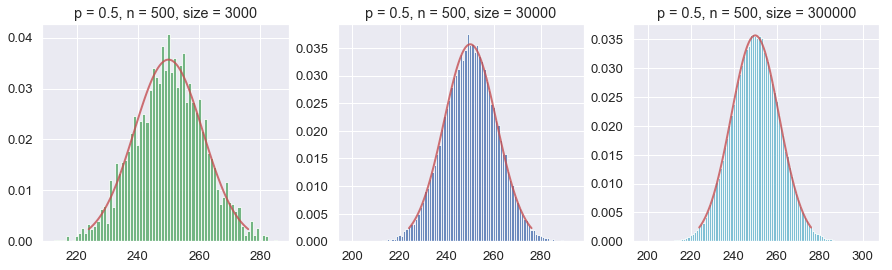

In [3]:
p = 0.5
n = 500
plt.figure(figsize=(15, 4))
for s, c, sp in [(3000, "g", 131), (30000, "b", 132), (300000, "c", 133)]:
    plt.subplot(sp)
    va = stats.binom.rvs(n, p, size=s)
    plt.hist(va, bins=max(va) - min(va), alpha=0.8, density=True, color=c, align="left")
    x = np.linspace(
        stats.norm.ppf(0.01, n * p, np.sqrt(n * p * (1 - p))),
        stats.norm.ppf(0.99, n * p, np.sqrt(n * p * (1 - p))),
        100,
    )
    plt.plot(
        x,
        stats.norm.pdf(x, n * p, np.sqrt(n * p * (1 - p))),
        "r-",
        lw=2,
        alpha=0.8,
        label="norm pdf",
    )
    plt.title("p = 0.5, n = 500, size = {}".format(s))
plt.show()


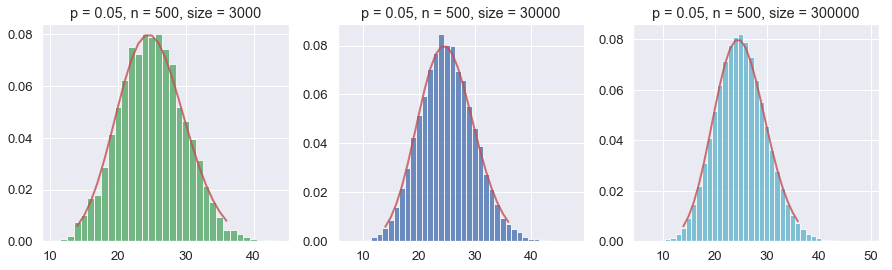

In [4]:
p = 0.05
n = 500
plt.figure(figsize=(15, 4))
for s, c, sp in [(3000, "g", 131), (30000, "b", 132), (300000, "c", 133)]:
    plt.subplot(sp)
    va = stats.binom.rvs(n, p, size=s)
    x = np.arange(stats.poisson.ppf(0.01, mu=n * p), stats.poisson.ppf(0.99, mu=n * p))
    plt.hist(va, bins=max(va) - min(va), alpha=0.8, density=True, color=c, align="left")
    plt.plot(x, stats.poisson.pmf(x, mu=n * p), "r-", lw=2, alpha=0.8, label="norm pdf")
    plt.title("p = 0.05, n = 500, size = {}".format(s))
plt.show()


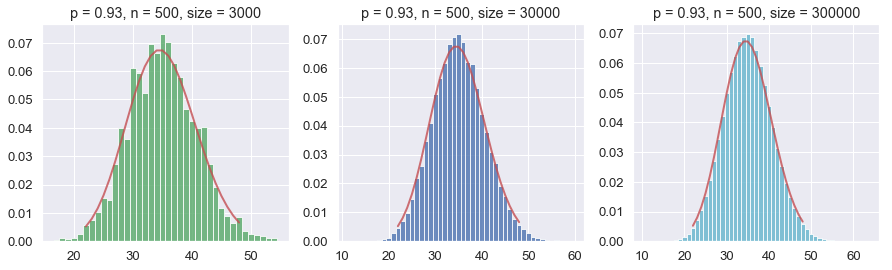

In [5]:
p = 0.93
n = 500
plt.figure(figsize=(15, 4))
for s, c, sp in [(3000, "g", 131), (30000, "b", 132), (300000, "c", 133)]:
    plt.subplot(sp)
    va = stats.binom.rvs(n, 1 - p, size=s)
    plt.hist(va, bins=max(va) - min(va), alpha=0.8, density=True, color=c, align="left")
    x = np.arange(
        stats.poisson.ppf(0.01, mu=n * (1 - p)), stats.poisson.ppf(0.99, mu=n * (1 - p))
    )
    plt.plot(
        x, stats.poisson.pmf(x, mu=n * (1 - p)), "r-", lw=2, alpha=0.8, label="norm pdf"
    )
    plt.title("p = 0.93, n = 500, size = {}".format(s))
plt.show()



### 1.3 Relationship between the parameter n and the approximation error


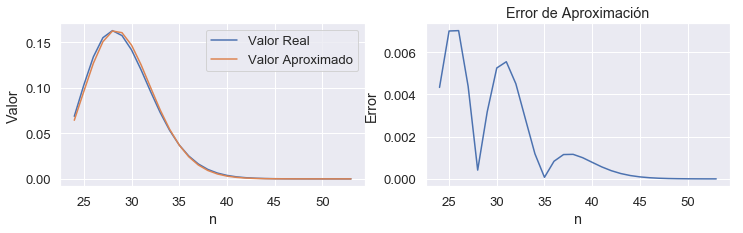

In [6]:
plt.figure(figsize=(12, 3))
p = 0.7
a = 20
n_val = []
e_val = []
binom_val = []
norm_val = []
e = 1000
n = 24
while e > 0.000001:
    p_real = stats.binom.pmf(a, n, p)
    p_aprox = stats.norm.pdf(a, loc=n * p, scale=np.sqrt(n * p * (1 - p)))
    e = abs(p_real - p_aprox)
    n_val.append(n)
    e_val.append(e)
    norm_val.append(p_aprox)
    binom_val.append(p_real)
    n = n + 1
plt.subplot(121)
plt.plot(n_val, binom_val, label="Real value")
plt.plot(n_val, norm_val, label="Approximate value")
plt.ylabel("Value")
plt.xlabel("n")
plt.legend(loc="best")
plt.subplot(122)
plt.plot(n_val, e_val, label="Error")
plt.title("approximation error")
plt.ylabel("Error")
plt.xlabel("n")
plt.show()



We can see that there is indeed a relationship between the value of n and the approximation error. The higher n, the values of $P(x=a)$ in both distributions tend to zero. Note also that the actual and approximate value curves resemble each other and at some points cross each other, which causes the shape of the error curve to have valleys at these values.



## 2. Effect of sample size on the approximation error



### 2.1 We will generate data from the gamma distribution, for a mean equal to 12, and variance equal to 36. We will iteratively increase the amount of data generated until the error of the real vs. sample mean is less than $10^{-3}$.

 For a mean of 12 and variance of 36, $\alpha = 4, \beta = 3$ is used, since $E[X] = \alpha\beta=12, V[X] = \alpha\beta^2=36 $.


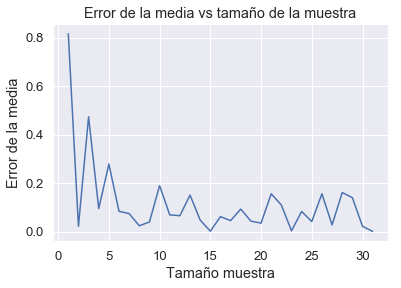

In [7]:
a = 4
b = 3
s = 1  # size
x = []
g = stats.gamma.rvs(a=a, scale=b, size=s)
error = abs(12 - g.mean()) / 12
x.append(error)
while error >= 10 ** (-3):
    s = s + 1
    g = stats.gamma.rvs(a=a, scale=b, size=s)
    error = abs(12 - g.mean()) / 12
    x.append(error)
plt.plot(np.arange(1, len(x) + 1), x)
plt.title("Error de la media vs tamaño de la muestra")
plt.ylabel("Error de la media")
plt.xlabel("Tamaño muestra")
plt.show()



### 2.2 We will design an iterative procedure, which will allow us to find the value of the shape parameter under which the probability of obtaining data less than 12 is 0.4, with an error less than $10^{−3}$.

 The designed procedure consists of the following. A random value will be assumed for *shape* between 0 and 10. Then, it will be tested if that value makes the requested Gamma distribution comply with the requested calculation, analyzing the error value. If the error is too high, the test shape value will be increased or decreased, by a *step* increment. When the error changes sign, that is, from a very low value of *shape* to a very high one or vice versa, then the order of magnitude of *step* will be decreased, to obtain the *shape* value with better precision. The process will be repeated until the error is less than the ordered quantity.


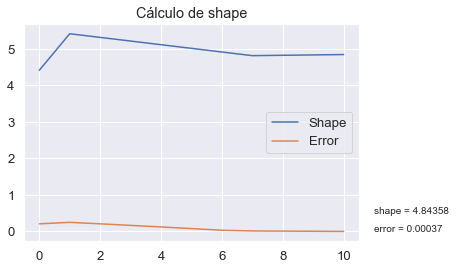

In [8]:
a = np.random.random() * 10
b = 3
step = 1
a_values = []
e_values = []
fg = stats.gamma.cdf(12, a=a, scale=b)
error = (0.4 - fg) / 0.4
a_values.append(a)
e_values.append(abs(error))
signo = np.sign(error)
while abs(error) >= 10 ** (-3):
    if signo != np.sign(error):
        step = step / 10
        signo = np.sign(error)
    # incrementar el valor de shape disminuye el valor de P(x < 12) y viceversa.
    if error < 0:
        a = a + step
    else:
        a = a - step
    fg = stats.gamma.cdf(12, a=a, scale=b)
    error = (0.4 - fg) / 0.4
    a_values.append(a)
    e_values.append(abs(error))
plt.plot(a_values, label="Shape")
plt.plot(e_values, label="Error")
plt.title("Cálculo de shape")
plt.legend(loc="best")
plt.text(len(a_values), 0.5, "shape = {}".format(round(a, 5)))
plt.text(len(a_values), 0, "error = {}".format(round(abs(error), 5)))
plt.show()



## 3. LDA applied to bivariate normal samples (evaluation of linear frontiers on nonlinear frontiers)



### 3.1 We will obtain 3 bivariate normal samples of size 10000, with the given parameters.


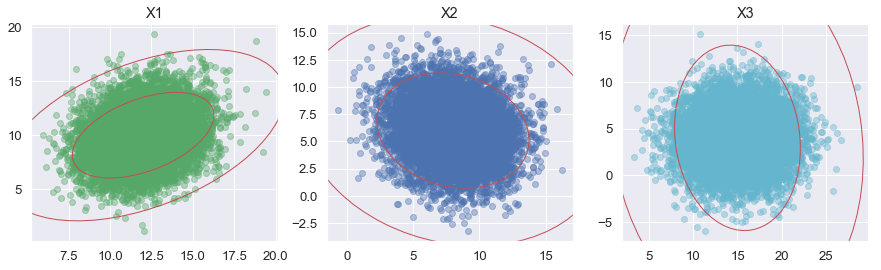

In [9]:
import matplotlib.patches as patches

plt.figure(figsize=(15, 4))

ax = plt.subplot(131)
x_1 = stats.multivariate_normal.rvs(mean=[12, 10], cov=[[3, 0.9], [0.9, 5]], size=10000)
plt.scatter(np.hsplit(x_1, 2)[0], np.hsplit(x_1, 2)[1], alpha=0.4, color="g")
e11 = patches.Ellipse((12, 10), 2 * 5, 2 * 3, 0.9 * 45, edgecolor="r", facecolor="none")
ax.add_patch(e11)
e12 = patches.Ellipse((12, 10), 4 * 5, 4 * 3, 0.9 * 45, edgecolor="r", facecolor="none")
ax.add_patch(e12)
plt.title("X1")

ax = plt.subplot(132)
x_2 = stats.multivariate_normal.rvs(mean=[8, 6], cov=[[5, -0.7], [-0.7, 6]], size=10000)
plt.scatter(np.hsplit(x_2, 2)[0], np.hsplit(x_2, 2)[1], alpha=0.4, color="b")
e21 = patches.Ellipse((8, 6), 2 * 6, 2 * 5, -0.7 * 45, edgecolor="r", facecolor="none")
ax.add_patch(e21)
e22 = patches.Ellipse((8, 6), 4 * 6, 4 * 5, -0.7 * 45, edgecolor="r", facecolor="none")
ax.add_patch(e22)
plt.title("X2")

ax = plt.subplot(133)
x_3 = stats.multivariate_normal.rvs(mean=[15, 4], cov=[[10, 0.2], [0.2, 7]], size=10000)
plt.scatter(np.hsplit(x_3, 2)[0], np.hsplit(x_3, 2)[1], alpha=0.4, color="c")
e31 = patches.Ellipse((15, 4), 2 * 7, 2 * 10, 0.2 * 45, edgecolor="r", facecolor="none")
ax.add_patch(e31)
e32 = patches.Ellipse((15, 4), 4 * 7, 4 * 10, 0.2 * 45, edgecolor="r", facecolor="none")
ax.add_patch(e32)
plt.title("X3")

plt.show()



### 3.2 Using the values obtained in the previous section, we will calculate the percentage of data from each sample that is inside the ellipses.


In [10]:
def insideEllipse(data, point):
    h, k, a, b, alfa = data
    x, y = point
    firstForm = ((np.cos(alfa) * (x - h) + np.sin(alfa) * (y - k)) / a) ** 2
    secondForm = ((np.sin(alfa) * (x - h) - np.cos(alfa) * (y - k)) / b) ** 2
    return firstForm + secondForm


In [11]:
elip11 = (12, 10, 5, 3, np.radians(0.9 * 45))
elip12 = (12, 10, 2 * 5, 2 * 3, np.radians(0.9 * 45))
elip21 = (8, 6, 6, 5, np.radians(-0.7 * 45))
elip22 = (8, 6, 2 * 6, 2 * 5, np.radians(-0.7 * 45))
elip31 = (15, 4, 7, 10, np.radians(0.2 * 45))
elip32 = (15, 4, 2 * 7, 2 * 10, np.radians(0.2 * 45))

cont11, cont12, cont21, cont22, cont31, cont32 = (0, 0, 0, 0, 0, 0)

for point in x_1:
    if insideEllipse(elip11, point) <= 1:
        cont11 = cont11 + 1
    if insideEllipse(elip12, point) <= 1:
        cont12 = cont12 + 1
print("Para X1:")
print("{}% dentro de elipse interior".format(cont11 / 100))
print("{}% dentro de elipse exterior".format(cont12 / 100))

for point in x_2:
    if insideEllipse(elip21, point) <= 1:
        cont21 = cont21 + 1
    if insideEllipse(elip22, point) <= 1:
        cont22 = cont22 + 1
print("Para X2:")
print("{}% dentro de elipse interior".format(cont21 / 100))
print("{}% dentro de elipse exterior".format(cont22 / 100))

for point in x_3:
    if insideEllipse(elip31, point) <= 1:
        cont31 = cont31 + 1
    if insideEllipse(elip32, point) <= 1:
        cont32 = cont32 + 1
print("Para X3:")
print("{}% dentro de elipse interior".format(cont31 / 100))
print("{}% dentro de elipse exterior".format(cont32 / 100))


Para X1:
84.11% dentro de elipse interior
99.82% dentro de elipse exterior
Para X2:
93.17% dentro de elipse interior
100.0% dentro de elipse exterior
Para X3:
96.52% dentro de elipse interior
99.99% dentro de elipse exterior



We can interpret the areas covered by the ellipses as confidence zones, where we can ensure that most of the data will be found. Data not covered by the inner ellipse are further from the mean than normal, while data not inside the second ellipse are outliers in the random sample. Therefore, it is remarkable that the data that are enclosed by the inner ellipse are those that best fit the model.

###  3.3 Application of LDA to the classification of samples. We will assume that LDA gives us the given lines as borders.

 First, a visualization of the given lines compared with the data of each random sample.


In [12]:
def draw_line(m, b, xi, xf):
    x = np.linspace(xi, xf, 2)
    plt.plot(x, m * x + b, "r-", lw=2, alpha=0.6, label="Frontera LDA")


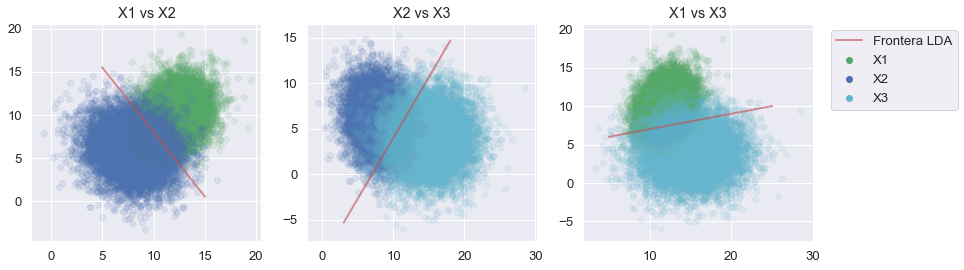

In [13]:
plt.figure(figsize=(14, 4))

ax = plt.subplot(131)
plt.scatter(np.hsplit(x_1, 2)[0], np.hsplit(x_1, 2)[1], alpha=0.1, color="g")
plt.scatter(np.hsplit(x_2, 2)[0], np.hsplit(x_2, 2)[1], alpha=0.1, color="b")
draw_line(-3 / 2, 23, 5, 15)
plt.title("X1 vs X2")

ax = plt.subplot(132)
plt.scatter(np.hsplit(x_2, 2)[0], np.hsplit(x_2, 2)[1], alpha=0.1, color="b")
plt.scatter(np.hsplit(x_3, 2)[0], np.hsplit(x_3, 2)[1], alpha=0.1, color="c")
draw_line(4 / 3, -28 / 3, 3, 18)
plt.title("X2 vs X3")

ax = plt.subplot(133)
plt.scatter(np.hsplit(x_1, 2)[0], np.hsplit(x_1, 2)[1], alpha=0.1, color="g")
plt.scatter(np.hsplit(x_3, 2)[0], np.hsplit(x_3, 2)[1], alpha=0.1, color="c")
draw_line(1 / 5, 5, 5, 25)
plt.title("X1 vs X3")

# Las siguientes líneas son para visualizar mejor la simbología
plt.scatter([], [], color="g", label="X1")
plt.scatter([], [], color="b", label="X2")
plt.scatter([], [], color="c", label="X3")
ax.legend(bbox_to_anchor=(1.05, 1), loc="best")

plt.show()



Now, we will calculate the confusion matrix for each frontier.


In [14]:
def check_line(m, b, pto):
    x, y = pto
    y_lin = m * x + b
    if y > y_lin:
        return 1
    if y < y_lin:
        return -1
    return 0


# 1 es sobre la linea, -1 es bajo la linea, 0 es en la linea


In [15]:
def create_cf_matrix(sample1, sample2, m, b, names, i, flag=True):
    cf_matrix = [[0, 0], [0, 0]]
    for pto in sample1:
        if check_line(m, b, pto) > 0:
            cf_matrix[0][0] = cf_matrix[0][0] + 1
        else:
            cf_matrix[1][0] = cf_matrix[1][0] + 1

    for pto in sample2:
        if check_line(m, b, pto) > 0:
            cf_matrix[0][1] = cf_matrix[0][1] + 1
        else:
            cf_matrix[1][1] = cf_matrix[1][1] + 1

    df_cm = pd.DataFrame(cf_matrix, names, names)
    sn.heatmap(df_cm, annot=True, fmt="d", annot_kws={"size": 14}, cbar=flag)
    plt.title("Frontera {}".format(i))
    plt.ylabel("Value Predicho")
    plt.xlabel("Value Real")


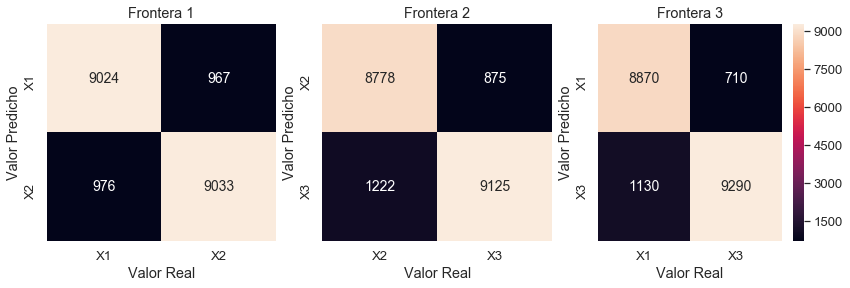

In [16]:
plt.figure(figsize=(14, 4))
plt.subplot(131)
create_cf_matrix(x_1, x_2, -3 / 2, 23, ["X1", "X2"], 1, False)
plt.subplot(132)
create_cf_matrix(x_2, x_3, 4 / 3, -28 / 3, ["X2", "X3"], 2, False)
plt.subplot(133)
create_cf_matrix(x_1, x_3, 1 / 5, 5, ["X1", "X3"], 3)
plt.show()



### 3.4 What is the probability that data from one sample will be classified in another sample?

 To obtain the probability, it is enough to consider the proportion between the data that were erroneously classified in each of the cells of the confusion matrices; and the total classified data. So:

 $P(\text{predicted value}\neq\text{actual value}) = (961+1012+1277+869+1177+684)/60000 \approx 9.96 \% $



## 4. Conclusions

 From the graphs in section 1.2, we can see that, indeed, as we increase the size of the sample, the sample gets closer to the theoretical model of the distribution that it approximates. Clearly, starting at an order of magnitude of $10^4$, the approximation is quite good, and starting at $10^5$, it is almost perfect.

 The graph in section 2.2 reveals that the error in the mean tends to be very high for very small sample sizes, around $10$. However, the error can vary considerably despite the order of magnitude of the data.

 In section 2.3 we can clearly see that the level of the error corresponds to how many digits of the shape value we have found.

 Finally, note that in section 3, due to the fact that the random samples overlap considerably with each other, the LDA classification model is hardly able to present better results by a relevant margin. In the zones where there is not much overlap, the model is clearly able to identify data from each group, while the relatively high classification error found $(\approx 10\%)$, is due to said zone of overlap.
